<a href="https://colab.research.google.com/github/anshuthakur/MachineLearning/blob/master/image_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_rn50

from sklearn.cluster import KMeans


In [2]:
class ClusteringImages:

  def __init__(self):
    pass
  
  def get_vectors(self, image_path, model, preprocess_input):

    model.layers[0].trainable = False

    image_feature_list = []

    for f in os.listdir(image_path):
      fullpath = os.path.join(image_path, f)
      im = cv2.imread(fullpath)

      #resize image
      im = cv2.resize(im, (224, 224))
      im_data = image.img_to_array(im)

      im_data = np.expand_dims(im_data,axis = 0)
      im_data = preprocess_input(im_data)

      features = model.predict(im_data)
      features_toarray = np.array(features)

      image_feature_list.append(features_toarray.flatten())
    
    return image_feature_list
  
  def _get_clusters(self, feature_array):
    kmeans = KMeans(n_clusters = 6, random_state = 0).fit(feature_array)
    return kmeans
  
  def cluster_images(self, image_path, model_name):

    model_dict = {"ResNet50": [ResNet50(include_top=False, weights = "imagenet", pooling = "max"), preprocess_input_rn50]
                  }
    model, preprocess_input = model_dict[model_name]

    feature_list = self.get_vectors(image_path, model, preprocess_input)

    kmeans_model = self._get_clusters(feature_list)
    return kmeans_model


In [3]:
models = ["ResNet50"]
clustering_models = []
img_files_path = "pics/"

for m in models:
  c = ClusteringImages()
  cluster_model = c.cluster_images(img_files_path, m)
  clustering_models.append(cluster_model)


RESNET 50
Label - 0


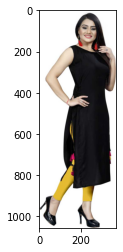

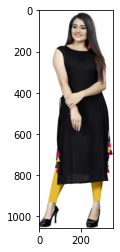

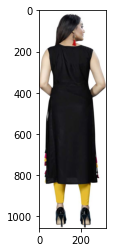

************************************************************************************************************************
Label - 1


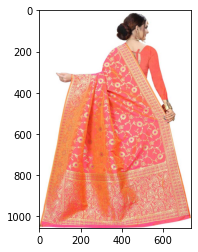

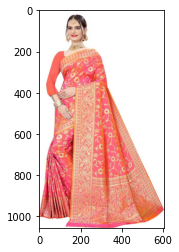

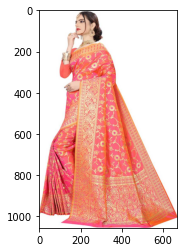

************************************************************************************************************************
Label - 2


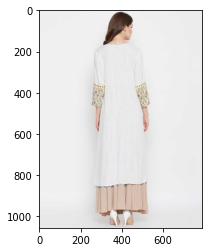

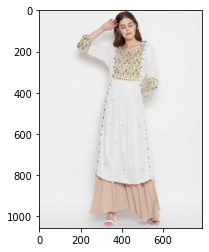

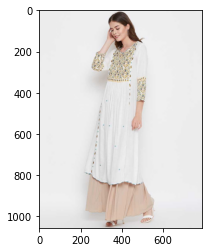

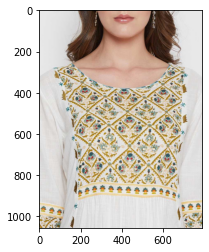

************************************************************************************************************************
Label - 3


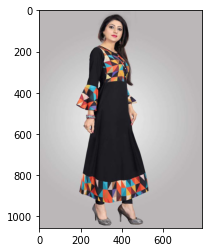

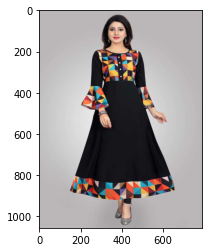

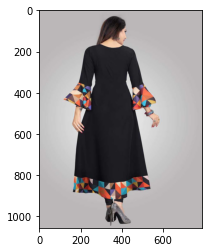

************************************************************************************************************************
Label - 4


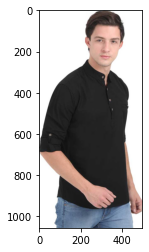

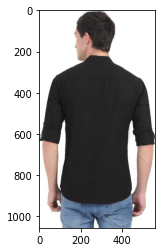

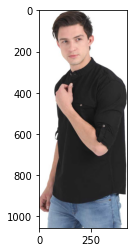

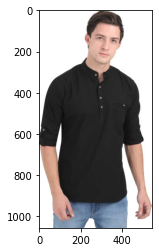

************************************************************************************************************************
Label - 5


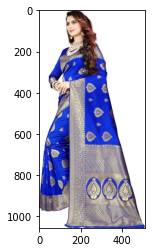

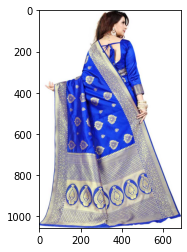

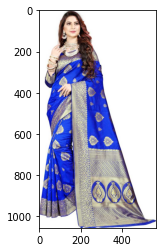

************************************************************************************************************************


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

image_files = [os.path.join(img_files_path,f) for f in os.listdir(img_files_path)]

print("RESNET 50")
label_vals = clustering_models[0].labels_

for n in range(6):
  print(f"Label - {n}")
  for i in range(20):
    if label_vals[i] == n:
      im = cv2.imread(image_files[i])
      im_new = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      plt.imshow(im_new)
      plt.show()
  print("*"*120)
